In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
games_df = pd.read_csv('games.csv', index_col='game_id')
games_df.head()

,first_dealer,first_player,total_turns,dealer_losses
game_id,,,,
0,RandomizingAgent-0,RandomizingAgent-1,0,0
1,RandomizingAgent-0,RandomizingAgent-1,0,0
2,RandomizingAgent-0,RandomizingAgent-1,0,0
3,RandomizingAgent-0,RandomizingAgent-1,0,0
4,RandomizingAgent-0,RandomizingAgent-1,0,0


In [3]:
rounds_df = pd.read_csv('rounds.csv', index_col=['game_id', 'round_id'])
rounds_df.head()

looser_id  dealer_id  num_drinks  card_face
game_id round_id                                             
0       0                 1          0           1         12
        1                 2          0           4          7
        2                 3          0           5          6
        3                 0          1           3          2
        4                 1          1           3          3

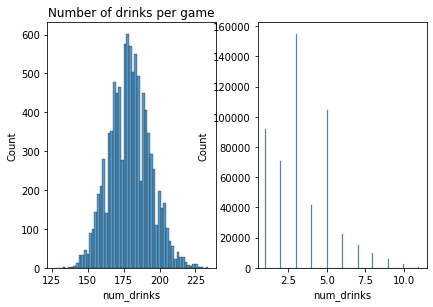

In [7]:
fig, axes = plt.subplots(ncols=2)
fig.tight_layout()
# Number of drinks per game
sns.histplot(rounds_df.groupby('game_id').num_drinks.sum(), ax=axes[0])
# Number of drinks per round
sns.histplot(rounds_df, x='num_drinks', ax=axes[1])

axes[0].set_title('Drinks per game')
axes[0].set_title('Drinks per round/card')
plt.show()

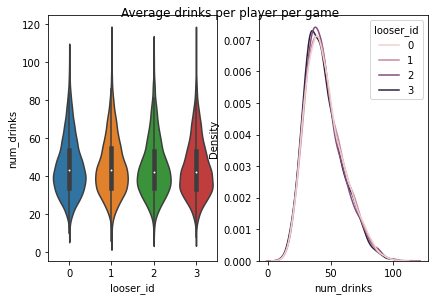

In [10]:
fig, axes = plt.subplots(ncols=2)
fig.tight_layout()
# Average drinks per player
sns.violinplot(data=rounds_df.groupby(['game_id', 'looser_id']).sum().reset_index(), x='looser_id', y='num_drinks', ax=axes[0])
# Average drinks per player
sns.kdeplot(data=rounds_df.groupby(['game_id', 'looser_id']).num_drinks.sum().reset_index(), x='num_drinks', hue='looser_id', ax=axes[1])

fig.suptitle('Average drinks per player per game')
plt.show()

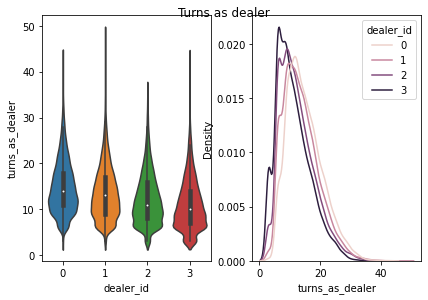

In [11]:
fig, axes = plt.subplots(ncols=2)
fig.tight_layout()
# Distribution of dealer turns by player
sns.violinplot(data=rounds_df.groupby(['game_id', 'dealer_id']).agg(turns_as_dealer=('num_drinks','count')).reset_index(), x='dealer_id', y='turns_as_dealer', ax=axes[0])
# Distribution of dealer turns by player
sns.kdeplot(data=rounds_df.groupby(['game_id', 'dealer_id']).agg(turns_as_dealer=('num_drinks','count')).reset_index(), hue='dealer_id', x='turns_as_dealer', ax=axes[1])
#sns.displot(df, hue='dealer_id')
fig.suptitle('Turns as dealer')
plt.show()